<a href="https://colab.research.google.com/github/juansokil/Scripts-Tesis/blob/master/03.LDA_BaseDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np

# spacy for lemmatization
import spacy
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm')

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary
from gensim.matutils import hellinger

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pickle



In [0]:
###Carga diccionario (y chequea) ###
#dictionary = corpora.Dictionary.load('../LDA/dictionary.pkl')
id2word = pickle.load(open("C:/Users/Juan/Dropbox/POSGRADOS/Uba/99-Tesis/scripts/scripts/LDA/dictionary.pkl", "rb"))
corpus = pickle.load(open("C:/Users/Juan/Dropbox/POSGRADOS/Uba/99-Tesis/scripts/scripts/LDA/corpus.pkl", "rb"))
base_genero = pd.read_csv("C:/Users/Juan/Dropbox/POSGRADOS/Uba/99-Tesis/scripts/scripts/base_completa/base_completa.csv", sep='\t', encoding='utf-8')


In [0]:
len(id2word)

eta=(200/len(id2word))
eta

0.002021651891760758

Modelo con los mejores parametros, optimizado despues de hacer muchas pruebas

In [0]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


np.random.seed(1977)
num_topics=100
eta=(200/len(id2word))

#passes: Number of passes through the entire corpus
passes=10
#(25% de la base)#
chunksize=13314
### Iterations###
iterations=1000

%time lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100, iterations=iterations, passes=passes,  chunksize=chunksize, alpha='auto', eta=eta)


#https://www.kaggle.com/ktattan/lda-and-document-similarity

C:\Users\Juan\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


Wall time: 10min 42s


In [0]:
pyLDAvis.enable_notebook()
d = id2word
c = corpus
lda = lda_model


# Enable logging for gensim - optional
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
warnings.filterwarnings("ignore",category=DeprecationWarning)
pyLDAvis.gensim.prepare(lda, c, d, sort_topics=False)

####save LDA davis####
#pyLDAvis.save_html(vis,'vis_gensim.html')

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
0      0.685596        1       1  0.026445  0.033032
1      0.291095        1       2 -0.127727 -0.002620
2      1.904619        1       3  0.094133 -0.020167
3      0.790640        1       4  0.032569  0.011718
4      0.217791        1       5 -0.299650  0.068181
5      1.669189        1       6  0.115871  0.177829
6      1.369447        1       7  0.105788  0.034618
7      1.721120        1       8  0.065123 -0.170220
8      1.079342        1       9 -0.007960 -0.042489
9      1.082549        1      10  0.073980 -0.018460
10     1.079968        1      11  0.030954 -0.104459
11     1.725752        1      12  0.068652 -0.165607
12     0.960310        1      13  0.017963 -0.034399
13     0.236894        1      14 -0.314258  0.080246
14     1.176496        1      15  0.036902 -0.201857
15     0.883839        1      16  0.063329  0.080075
16     1.229891        1      17  0.030307 -0.174558
17     0.778288        1      18  0.001520 -0.079577
18     1.476058        1      19  0.012195 -0.136400
19     1.093427        1      20  0.019782 -0.182246
20     2.651824        1      21  0.146561  0.181605
21     1.086788        1      22  0.059354  0.018098
22     1.354021        1      23  0.094673  0.129626
23     0.306418        1      24 -0.137608  0.004243
24     1.009017        1      25  0.076658  0.075067
25     1.536107        1      26  0.114964  0.168846
26     1.300224        1      27  0.096395 -0.012230
27     0.841280        1      28  0.007108 -0.098652
28     0.881508        1      29  0.011883 -0.040238
29     1.005018        1      30  0.029813 -0.072311
...         ...      ...     ...       ...       ...
70     0.237136        1      71 -0.155524  0.010547
71     1.310756        1      72  0.033089 -0.194761
72     1.441703        1      73  0.045370 -0.131307
73     1.395522        1      74  0.125281  0.125352
74     0.723927        1      75 -0.016428 -0.019766
75     0.816384        1      76  0.010521 -0.032722
76     0.737442        1      77  0.018389 -0.000732
77     0.909682        1      78  0.059656  0.078106
78     0.362394        1      79 -0.309487  0.070119
79     0.302744        1      80 -0.331761  0.086554
80     1.014950        1      81  0.056139  0.113205
81     0.288053        1      82 -0.300186  0.068259
82     0.231520        1      83 -0.171207  0.018857
83     1.779196        1      84  0.137383  0.178537
84     0.600869        1      85 -0.008728  0.025664
85     0.684858        1      86  0.005094 -0.023742
86     0.779398        1      87 -0.017148 -0.092795
87     1.628021        1      88  0.122893  0.142177
88     0.858153        1      89  0.060661  0.078272
89     1.375209        1      90  0.027278 -0.152643
90     1.251393        1      91  0.105866  0.057833
91     1.401063        1      92  0.061934 -0.140515
92     0.784054        1      93  0.013143 -0.009850
93     0.911434        1      94  0.028133 -0.012439
94     0.905755        1      95  0.060562  0.097063
95     5.232671        1      96  0.181433  0.198765
96     0.859336        1      97  0.010866 -0.091891
97     0.777521        1      98  0.031303  0.018941
98     0.912900        1      99  0.040981  0.084981
99     0.884912        1     100  0.027658 -0.024451

[100 rows x 5 columns], topic_info=       Category         Freq                   Term        Total  loglift  \
term                                                                        
67237   Default  8370.000000       effective_change  8370.000000  30.0000   
52894   Default  7997.000000           work_promote  7997.000000  29.0000   
16787   Default  7774.000000  challenge_patriarchal  7774.000000  28.0000   
61135   Default  7230.000000        woman_worldwide  7230.000000  27.0000   
49189   Default  7130.000000      sexual_oppression  7130.000000  26.0000   
77614   Default  6935.000000                 usable  69

In [0]:
###Save LDA model####
#pickle.dump(lda_model, open("C:/Users/Juan/Dropbox/POSGRADOS/Uba/99-Tesis/scripts/scripts/LDA/lda_model.pkl", "wb"))

###Chequeo que se haya guardado bien###
lda_model = pickle.load(open("C:/Users/Juan/Dropbox/POSGRADOS/Uba/99-Tesis/scripts/scripts/LDA/lda_model.pkl", "rb"))

print (lda_model.print_topics())


[(1, '0.021*"behavioural" + 0.017*"mexican_american" + 0.014*"sext" + 0.012*"difference_perception" + 0.010*"send" + 0.009*"smartphone" + 0.009*"nutritional_status" + 0.008*"factor_include" + 0.008*"prevention_intervention" + 0.008*"field_experiment"'), (34, '0.022*"movie" + 0.021*"integration" + 0.014*"aa" + 0.013*"toddler" + 0.011*"fracture" + 0.010*"mind" + 0.009*"sexuality_gender" + 0.008*"sexual_attitude" + 0.008*"osteoporosis" + 0.008*"role_identity"'), (84, '0.021*"fat" + 0.016*"new_zealand" + 0.014*"mexican" + 0.007*"brown" + 0.007*"infertility" + 0.006*"biomedical" + 0.006*"caribbean" + 0.006*"alexithymia" + 0.006*"lecturer" + 0.005*"mexico"'), (35, '0.029*"ipv" + 0.020*"drug_use" + 0.017*"speaker" + 0.014*"typology" + 0.010*"authenticity" + 0.009*"intimate_partner_violence_ipv" + 0.009*"simulation" + 0.008*"blood" + 0.007*"somatic" + 0.007*"dual"'), (0, '0.021*"security" + 0.015*"leisure" + 0.008*"dominance" + 0.008*"bilingual" + 0.008*"variant" + 0.007*"danish" + 0.007*"corp

In [0]:
####lambda## aca puedo obtener la probabilidad de cada palabra para cada topico
topics_terms = lda_model.state.get_lambda() 
#convert estimates to probability (sum equals to 1 per topic)
topics_terms_proba = np.apply_along_axis(lambda x: x/x.sum(),1,topics_terms)


In [0]:
###Hago un archivo con el total del diccionario
top_words_per_topic = []
for t in range(lda_model.num_topics):
    #top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn = len(id2word))])
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn = 20)])


#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("../resultados/total_words.csv")
top_words=pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
table = pd.pivot_table(top_words, values='P', index=['Word'],columns=['Topic'], aggfunc=np.sum)
table.to_csv("./words_probabilities.csv")


In [0]:
top_words_per_topic

[(0, 'security', 0.021035587),
 (0, 'leisure', 0.014770466),
 (0, 'dominance', 0.007996989),
 (0, 'bilingual', 0.007773245),
 (0, 'variant', 0.0077322596),
 (0, 'danish', 0.0071872617),
 (0, 'corpus', 0.006963997),
 (0, 'save', 0.0060701217),
 (0, 'leisure_activity', 0.0056664776),
 (0, 'comedy', 0.0052862074),
 (0, 'hero', 0.0051024025),
 (0, 'missionary', 0.004421106),
 (0, 'role', 0.0043746037),
 (0, 'mary', 0.004243416),
 (0, 'garden', 0.003912717),
 (0, 'phenotype', 0.0038920466),
 (0, 'coffee', 0.0035588064),
 (0, 'confrontation', 0.0034914254),
 (0, 'system', 0.0034640883),
 (0, 'organic', 0.003332046),
 (1, 'behavioural', 0.021215914),
 (1, 'mexican_american', 0.017349025),
 (1, 'sext', 0.014341853),
 (1, 'difference_perception', 0.0120077655),
 (1, 'send', 0.009961857),
 (1, 'smartphone', 0.008613702),
 (1, 'nutritional_status', 0.008564341),
 (1, 'factor_include', 0.007942805),
 (1, 'prevention_intervention', 0.007903717),
 (1, 'field_experiment', 0.007888251),
 (1, 'knowledg

In [0]:

#############ARMA TOPICOS - PROBABILIDADES#####
lda_model.n_topics=num_topics
topicnames = ["Topic" + str(i) for i in range(lda_model.n_topics)]
rango=len(corpus)
docnames = ["Doc" + str(i) for i in range(rango)]


#####Get document - topic values
theta, _ = lda_model.inference(corpus)
theta /= theta.sum(axis=1)[:, None]


In [0]:
##Trae el ID##
series = pd.Series(base_genero['id'])


df_document_topic = pd.DataFrame(np.round(theta,3), columns=topicnames, index=series)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic=df_document_topic.reset_index()


df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution.head()

,Topic Num,Num Documents
0,95,6351
1,20,2235
2,51,1590
3,2,1541
4,42,1541


In [0]:
df_document_topic.head()

,id,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,...,Topic91,Topic92,Topic93,Topic94,Topic95,Topic96,Topic97,Topic98,Topic99,dominant_topic
0,2-s2.0-84986161392,0.0,0.0,0.092,0.000,0.001,0.0,0.0,0.0,0.0,...,0.043,0.00,0.000,0.0,0.001,0.0,0.0,0.000,0.0,80
1,2-s2.0-84986161373,0.0,0.0,0.000,0.000,0.001,0.0,0.0,0.0,0.0,...,0.000,0.00,0.000,0.0,0.071,0.0,0.0,0.000,0.0,66
2,2-s2.0-84986064597,0.0,0.0,0.094,0.035,0.001,0.0,0.0,0.0,0.0,...,0.012,0.01,0.034,0.0,0.020,0.0,0.0,0.000,0.0,40
3,2-s2.0-84986173170,0.0,0.0,0.001,0.000,0.001,0.0,0.0,0.0,0.0,...,0.000,0.00,0.000,0.0,0.074,0.0,0.0,0.000,0.0,69
4,2-s2.0-84893935667,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.000,0.00,0.000,0.0,0.240,0.0,0.0,0.093,0.0,95


In [0]:
base_genero.reset_index()
df_document_topic.reset_index()

df_final = pd.concat([base_genero, df_document_topic], ignore_index=False, axis=1 )
df_final.head()

df_final.to_csv('C:/Users/Juan/Dropbox/POSGRADOS/Uba/99-Tesis/scripts/scripts/LDA/base_completa.csv, sep='\t', encoding='utf-8'')

In [0]:
df_topic_distribution

,Topic Num,Num Documents
0,95,6338
1,20,2244
2,51,1583
3,42,1547
4,2,1546
5,11,1264
6,83,1148
7,7,1122
8,5,1062
9,40,1039


Visualizar topicos

In [0]:
###VISUALIZAR
###https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
###https://www.kaggle.com/ykhorramz/lda-and-t-sne-interactive-visualization

In [0]:
###https://www.kaggle.com/ykhorramz/lda-and-t-sne-interactive-visualization####
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE

In [0]:

# angle value close to 1 means sacrificing accuracy for speed
tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca', perplexity=30, early_exaggeration=120)
X_tsne = tsne.fit_transform(theta)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 53257 samples in 0.911s...
[t-SNE] Computed neighbors for 53257 samples in 1098.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 53257
[t-SNE] Computed conditional probabilities for sample 2000 / 53257
[t-SNE] Computed conditional probabilities for sample 3000 / 53257
[t-SNE] Computed conditional probabilities for sample 4000 / 53257
[t-SNE] Computed conditional probabilities for sample 5000 / 53257
[t-SNE] Computed conditional probabilities for sample 6000 / 53257
[t-SNE] Computed conditional probabilities for sample 7000 / 53257
[t-SNE] Computed conditional probabilities for sample 8000 / 53257
[t-SNE] Computed conditional probabilities for sample 9000 / 53257
[t-SNE] Computed conditional probabilities for sample 10000 / 53257
[t-SNE] Computed conditional probabilities for sample 11000 / 53257
[t-SNE] Computed conditional probabilities for sample 12000 / 53257
[t-SNE] Computed conditional probabilities for 

In [0]:
# Dominant topic number in each doc
topic_num = np.argmax(theta, axis=1)
topic_num

array([80, 66, 40, ..., 20, 95, 64], dtype=int64)

In [0]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 100

from bokeh.palettes import Viridis256
from bokeh.palettes import Spectral
#mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])


mycolors=np.array(Viridis256[:100])
print(mycolors)
len(mycolors)




Loading BokehJS ...

['#440154' '#440255' '#440357' '#450558' '#45065A' '#45085B' '#46095C'
 '#460B5E' '#460C5F' '#460E61' '#470F62' '#471163' '#471265' '#471466'
 '#471567' '#471669' '#47186A' '#48196B' '#481A6C' '#481C6E' '#481D6F'
 '#481E70' '#482071' '#482172' '#482273' '#482374' '#472575' '#472676'
 '#472777' '#472878' '#472A79' '#472B7A' '#472C7B' '#462D7C' '#462F7C'
 '#46307D' '#46317E' '#45327F' '#45347F' '#453580' '#453681' '#443781'
 '#443982' '#433A83' '#433B83' '#433C84' '#423D84' '#423E85' '#424085'
 '#414186' '#414286' '#404387' '#404487' '#3F4587' '#3F4788' '#3E4888'
 '#3E4989' '#3D4A89' '#3D4B89' '#3D4C89' '#3C4D8A' '#3C4E8A' '#3B508A'
 '#3B518A' '#3A528B' '#3A538B' '#39548B' '#39558B' '#38568B' '#38578C'
 '#37588C' '#37598C' '#365A8C' '#365B8C' '#355C8C' '#355D8C' '#345E8D'
 '#345F8D' '#33608D' '#33618D' '#32628D' '#32638D' '#31648D' '#31658D'
 '#31668D' '#30678D' '#30688D' '#2F698D' '#2F6A8D' '#2E6B8E' '#2E6C8E'
 '#2E6D8E' '#2D6E8E' '#2D6F8E' '#2C708E' '#2C718E' '#2C728E' '#2B738E'
 '#2B7

100

In [0]:
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
#plot.scatter(x=X_tsne[:,0], y=X_tsne[:,1], color=mycolors[n_topics])
plot.scatter(x=X_tsne[:,0], y=X_tsne[:,1], color=mycolors[topic_num])
show(plot)

ValueError: too many values to unpack (expected 3)

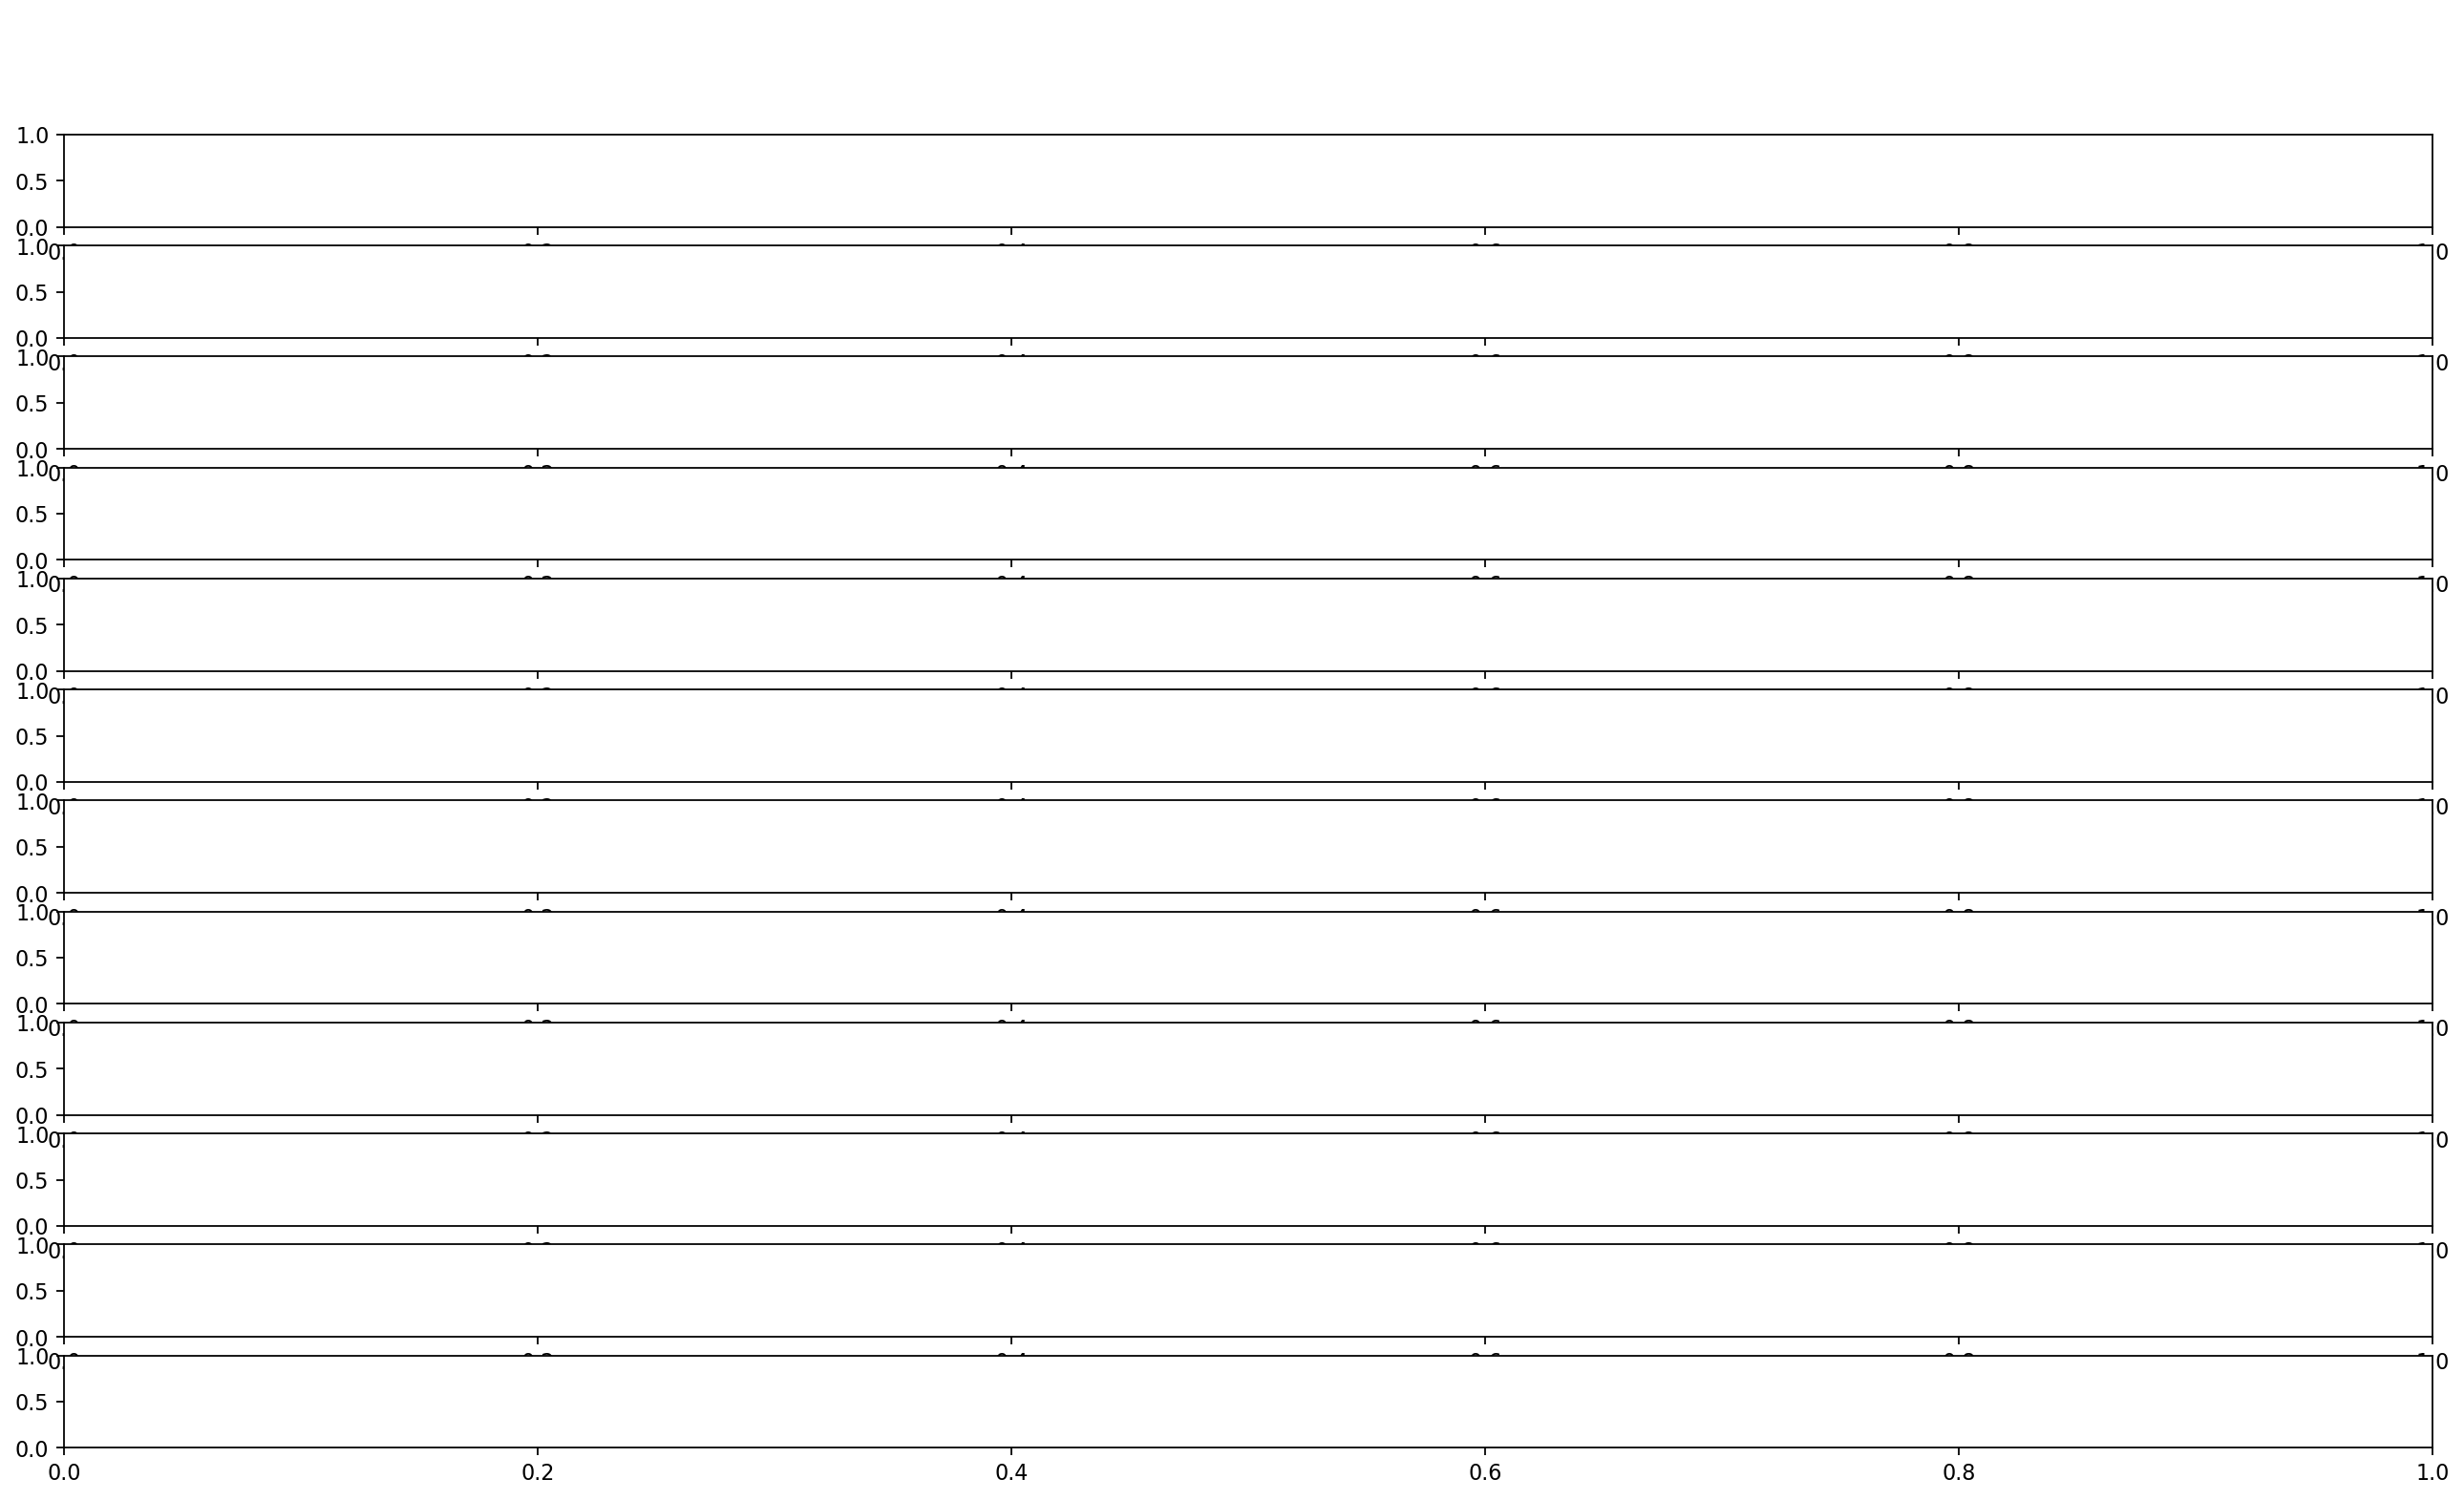

In [0]:
#####https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    